--------------------------HASIL-------------------------
Kromosom terbaik : [0, 9, 0, 5, 3, 9, 5, 4, 1, 9]
Nilai x terbaik : 1.86259862598626
Nilai y terbaik : 0.90839908399084
Fitness terbaik : 2.682182625687377 



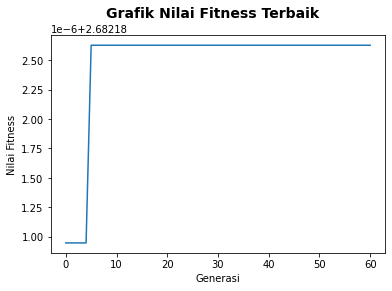

In [1]:
import random
import math
import numpy as np

def create_cromosome():
    kromosom=[]
    for j in range(10):
        kromosom.append(random.randint(0,9))
    return kromosom

def separate_x(k):
    kromosom_x=[]
    j = len(k)
    for i in range(j//2,j):
        kromosom_x.append(k[i])
    return kromosom_x

def separate_y(k):
    kromosom_y=[]
    j = len(k)
    for i in range(j//2,j):
        kromosom_y.append(k[i])
    return kromosom_y

def sigma():
    nilai=0
    for i in range(5):
        nilai+=(9*10**(-(i+1)))
    return nilai

def gen(kromosom):
    g = 0
    for i in range (0,5):
        g += (kromosom[i]*(10**(-(i+1))))
    return g

def decode_kromosom(b,a,g):
    nilai = b+(((a-b)/sigma())*g)
    return nilai

def decode_indiv(krom):
    x = decode_kromosom(-1,2,gen(separate_x(krom)))
    y = decode_kromosom(-1,1,gen(separate_y(krom)))
    return {'krom':krom,'fitness':fitness(x,y)}

def fungsi(x,y):
    return ((math.cos(x*y)*math.sin(y*y))+(x+y))

def fitness(x,y):
    return fungsi(x,y)

def create_population(n):
    populasi=[]
    for i in range (n):
        krom = create_cromosome()
        x = decode_kromosom(-1,2,gen(separate_x(krom)))
        y = decode_kromosom(-1,1,gen(separate_y(krom)))
        individual = {'krom':krom,'fitness':fitness(x,y)}
        populasi.append(individual)
    #print(populasi)
    return populasi

def tournament_selection(populasi):
    #mengambil parent dari populasi
    size = 8
    pop_tour = sorted(np.random.choice(populasi, size, replace=True),key=lambda x:x['fitness'])
    #print(pop_tour)
    hus = pop_tour[len(pop_tour)-1]
    wif = pop_tour[len(pop_tour)-2]
    #for i in range (len(pop_tour)):
    #    print(pop_tour[i])
    #print("hus", hus,"wif", wif)
    return hus,wif

def separate(k,n):
    up =[]
    down=[]
    for i in range(len(k)):
        if (i<n):
            up.append(k[i])
        else :
            down.append(k[i])
    #print("Up=", up, "down = ", down)
    return {'up':up,'down':down}

def single_crossover(individual_a, individual_b):
    #crossover untuk parent
    n = 2
    a = separate(individual_a,n)['up']
    b = separate(individual_b,n)['up']
    a.extend(separate(individual_b,n)['down'])
    b.extend(separate(individual_a,n)['down'])
    return a,b

def mutasi(kromosom):
    #mutasi untuk parent
    new_kromosom=[]
    new_kromosom.extend(kromosom)
    #print("kr",len(kromosom),"newkr",len(new_kromosom))
    i = random.randint(1,9)
    n = random.randint(0,9)
    while n == kromosom[i]:
      n = random.randint(0,9)
    new_kromosom[i] = n
    return new_kromosom

def elitisme(populasi,generasi_baru):
    #seleksi survivor
    #print("Min Genererasi baru : ", min([individual for individual in generasi_baru], key=lambda x: x['fitness']))
    generasi_baru.remove(min([individual for individual in generasi_baru], key=lambda x: x['fitness']))
    #print("Max Genererasi baru : ", max([individual for individual in generasi_baru], key=lambda x: x['fitness']))
    generasi_baru.append(max([individual for individual in populasi], key=lambda x: x['fitness']))
    return generasi_baru

batascrossover = 0.7 #pc
batasmutasi = 0.01 #pm
nilai_populasi = 100 #jumlah populasi
generasi = 60 #jumlah generasi
populasi = create_population(nilai_populasi) # mengenerate populasi

#PROSES GA
best_case=[] # inisialisasi array penampung kromosom dengan fitness terbaik tiap generasi
best_case.append(max(populasi, key=lambda x:x['fitness'])) # store kromosom terbaik pada generasi 1 ke array best_case
for i in range (generasi):  #penghentian evolusi berdasar jumlah generasi
    generasi_baru=[] #deklarasi dictionary generasi_baru
    generasi_baru = create_population(nilai_populasi-2) # mengenerate populasi untuk generasi selanjutnya
    probcross = random.random() # mendeklarasi nilai probabilitas crossover
    probmutasi = random.random() # mendeklarasi nilai probabilitas mutasi
    parent1, parent2 = tournament_selection(populasi) #proses tournament
    if (probcross <= batascrossover): #mengecek probabilitas crossover dengan pc
        anak1, anak2 = single_crossover(parent1['krom'],parent2['krom']) #jika memenuhi, crossover dieksekusi.
        if(probmutasi <= batasmutasi): #mengecek probabilitas mutasi dengan pm
            anak1 = mutasi(anak1) #proses mutasi anak1 (offspring)
            anak2 = mutasi(anak2) #proses mutasi anak2 (offspring)
        generasi_baru.append(decode_indiv(anak1)) #memasukkan hasil crossover dan mutasi kedalam generasi selanjutnya
        generasi_baru.append(decode_indiv(anak2)) #memasukkan hasil crossover dan mutasi kedalam generasi selanjutnya
    else : #jika crossover dan mutasi tidak dilakukan
        generasi_baru.append(parent1) #memasukkan parent1 kedalam generasi selanjutnya
        generasi_baru.append(parent2)#memasukkan parent2 kedalam generasi selanjutnya
    generasi_baru = elitisme(populasi,generasi_baru) #proses elitisme / mereplace fitness paling kecil di generasi selanjutnya dg fitness max di gen sebelum
    populasi = generasi_baru # memasukkan isi generasi selanjutnya kedalam generasi "sekarang" yang akan dieksekusi di looping selanjutnya
    best_case.append(max(populasi, key=lambda x:x['fitness'])) #memasukkan kromosom dengan fitness max di generasi sekarang kedalam array

best = [] #inisialisasi array untuk menampung nilai fitness
for i in range (len(best_case)): # looping sebanyak panjang best_case
    best.append(best_case[i]['fitness']) #memasukkan nilai fitness kedalam array best case
print("--------------------------HASIL-------------------------")
print("Kromosom terbaik :",best_case[len(best_case)-1]['krom'])
print("Nilai x terbaik :",decode_kromosom(-1,2,gen(separate_x(best_case[len(best_case)-1]['krom']))))
print("Nilai y terbaik :",decode_kromosom(-1,1,gen(separate_y(best_case[len(best_case)-1]['krom']))))
print("Fitness terbaik :",best_case[len(best_case)-1]['fitness'],"\n")
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Grafik Nilai Fitness Terbaik', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_ylabel('Nilai Fitness')
ax.set_xlabel('Generasi')
plt.plot(best)
plt.show()